In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 823 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()

In [3]:
symbol = 'AAPL'
start = '2021-08-20'
end = '2022-08-20'
df = yf.download(symbol,start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-20,147.440002,148.500000,146.779999,148.190002,147.364227,60549600
2021-08-23,148.309998,150.190002,147.889999,149.710007,148.875793,60131800
2021-08-24,149.449997,150.860001,149.149994,149.619995,148.786255,48606400
2021-08-25,149.809998,150.320007,147.800003,148.360001,147.533279,58991300
2021-08-26,148.350006,149.119995,147.509995,147.539993,146.717865,48597200


In [4]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [6]:
import statistics as st
print('Mean of returns:', st.mean(returns))
print('Median of returns:', st.median(returns))
print('Median Low of returns:', st.median_low(returns))
print('Median High of returns:', st.median_high(returns))
print('Median Grouped of returns:', st.median_grouped(returns))

Mean of returns: 0.0007887973785987448
Median of returns: 0.0005020712254051318
Median Low of returns: 0.0005020712254051318
Median High of returns: 0.0005020712254051318
Median Grouped of returns: 0.0005020712254051318


In [8]:
from statistics import mode
hist, bins = np.histogram(returns, 20)
maxfreq = max(hist)
print('Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])

Mode of bins: [(-0.005940383884050868, 0.00036945797766955307)]


In [9]:
print('Arithmetic average of returns:\n')
print(returns.mean())

Arithmetic average of returns:

0.0007887973785987448


In [10]:
from scipy.stats.mstats import gmean
print('Geometric mean of stock:', gmean(returns))

Geometric mean of stock: nan


In [11]:
ratios = returns + np.ones(len(returns))
R_G = gmean(ratios) - 1
print('Geometric mean of returns:', R_G)

Geometric mean of returns: 0.0006049344681875457


In [12]:
print('Standard deviation of returns')
print(returns.std())

Standard deviation of returns
0.019204150806228715


In [13]:
T = len(returns)
init_price = df['Adj Close'][0]
final_price = df['Adj Close'][T]
print('Initial price:', init_price)
print('Final price:', final_price)
print('Final price as computed with R_G:', init_price*(1 + R_G)**T)

Initial price: 147.36422729492188
Final price: 171.52000427246094
Final price as computed with R_G: 171.52000427246284


In [14]:
print('Harmonic mean of returns:', len(returns)/np.sum(1.0/returns))

Harmonic mean of returns: 0.0


Skew: -0.10335681162438592
Mean: 0.0007887973785987448
Median: 0.0005020712254051318


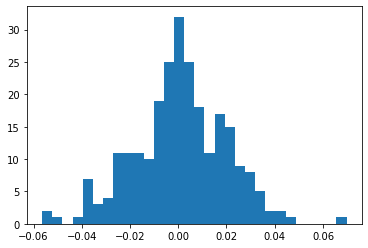

In [15]:
print('Skew:', stats.skew(returns))
print('Mean:', np.mean(returns))
print('Median:', np.median(returns))
plt.hist(returns, 30); 

Excess kurtosis of leptokurtic distribution: (array([ 1.02573480e-02, -6.01431382e-04, -8.42131193e-03, -5.52698640e-03,
        7.18448573e-03,  3.04171159e-02, -8.42463048e-03,  4.47867762e-03,
        7.47484632e-03,  4.23039109e-03,  1.54893825e-02, -1.00837135e-02,
       -6.70485577e-03, -3.31018228e-02,  3.89339399e-03, -9.56209513e-03,
        6.14362226e-03, -1.61041472e-03, -1.83479767e-02, -2.13610933e-02,
        3.42804450e-03,  1.68723039e-02,  6.71940152e-03,  6.12810221e-04,
       -1.05498807e-02, -2.38012278e-02,  6.48285740e-03, -9.31174998e-03,
        8.12716135e-03, -2.46057275e-02,  1.41585683e-02,  6.30713332e-03,
        9.08446881e-03, -2.72190112e-03, -6.29771066e-04, -9.10299866e-03,
       -4.23993049e-03,  2.02256965e-02,  7.51246991e-03,  1.18062280e-02,
        1.50801248e-02,  3.36107670e-03,  1.47398147e-03, -5.28499395e-03,
       -3.36317502e-04,  4.57489938e-03, -3.14767617e-03,  2.49916630e-02,
       -1.81555853e-02, -5.60742705e-03,  7.11599742e-

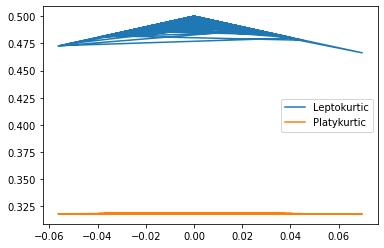

In [20]:
xs = np.linspace(-6,6, 1257)
normal = stats.norm.pdf(xs)
plt.plot(returns,stats.laplace.pdf(returns), label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(returns)))
plt.plot(returns,stats.cosine.pdf(returns), label='Platykurtic')
print('Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(returns)))
plt.legend()

In [21]:
print("Excess kurtosis of returns: ", stats.kurtosis(returns))

Excess kurtosis of returns:  0.47984810377806797


In [22]:
from statsmodels.stats.stattools import jarque_bera
_, pvalue, _, _ = jarque_bera(returns)
if pvalue > 0.05:
    print('The returns are likely normal.')
else:
    print('The returns are likely not normal.')

The returns are likely normal.
